## 위클리퀴즈 4주차

파일명을 4주차퀴즈_(성함)으로 변경 부탁드립니다.  
이번 주말까지 문제 푸시고, 모두 실행 후 파일 제출해주시면 됩니다.

#### 0. 펭귄 종 분류 모델을 만드세요.

펭귄의 종을 분류하는 모델을 만드는 것이 목표입니다.  
데이터 전처리, 시각화, 모델 학습과 평가를 순서대로 진행합니다.

#### 1. 펭귄 데이터를 불러오고, 요약 정보를 출력하세요.

seaborn 라이브러리에서 펭귄('penguins') 데이터를 불러옵니다.  
펭귄 데이터의 요약 정보를 출력합니다.

In [2]:
# 필요 기본라이브러리 load
import seaborn as sns
import pandas as pd
import numpy as np

# 펭귄 데이터셋
df = sns.load_dataset('penguins')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [54]:
df.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,342,342,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male
freq,151,167,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


#### 2. 결측치를 처리하세요.

결측치가 포함된 모든 행을 출력합니다.  
결측치가 3개 이상인 행은 삭제합니다.  
이후 남은 결측치를 평균, 중앙값, 최빈값 등 원하는 방식으로 대체합니다.  
결측치가 0개임을 확인합니다.

In [3]:
# 결측치가 있는 행 모두 출력
df[df.isna().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [4]:
# 결측치가 3개 이상인 '행'은 삭제
df.dropna(axis=0,thresh=4,inplace=True)
df[df.isna().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [5]:
df.groupby(['sex'])['body_mass_g'].mean()

sex
Female    3862.272727
Male      4545.684524
Name: body_mass_g, dtype: float64

In [6]:
# 이후 남은 결측치를 평균, 중앙값, 최빈값 등 원하는 방식으로 대체
df['sex'].value_counts() # male 168 female 165
df.groupby(['sex'])['body_mass_g'].mean() # 평균 무게를 기준으로 대체
def fill_sex_by_mass(row) :
    row = row.copy()
    if pd.isnull(row['sex']) :
        # print('sex is null') # ok
        male = df.groupby(['sex'])['body_mass_g'].mean()['Male']
        female = df.groupby(['sex'])['body_mass_g'].mean()['Female']
        std = (male+female)/2
        if row['body_mass_g'] < std : 
            row['sex']='Female'
        else :
            row['sex'] = 'Male'
        # print('now check sex',row['sex'])
    return row

# fill_sex_by_mass(df_drop.iloc[8]) # ok

df_fill_na_by_std_mass = df.apply(fill_sex_by_mass,axis=1)
df_fill_na_by_std_mass

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [7]:
# 결측치 0개 확인
df_fill_na_by_std_mass.isna().sum() # ok

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

#### 3. 범주형 데이터를 처리하세요.

범주형 데이터를 레이블 또는 원핫 인코딩 방식으로 변환합니다.  
인코딩 처리 후, 변환된 데이터의 첫 5개 행을 출력합니다.

In [21]:
# %pip install scikit-learn

In [23]:
df_fill_na_by_std_mass.info() # object 컬럼 : species, island, sex
df_preprocessing = df_fill_na_by_std_mass.copy()
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# 라벨인코딩 먼저
le_species = LabelEncoder()
le_island = LabelEncoder()
le_sex = LabelEncoder()
df_preprocessing['species'] = le_species.fit_transform(df_preprocessing['species'])
df_preprocessing['island'] = le_island.fit_transform(df_preprocessing['island'])
df_preprocessing['sex'] = le_sex.fit_transform(df_preprocessing['sex'])

df_preprocessing
# sex => 1/0으로 추가 인코딩 불필요(True/False)

# OneHotEncoding
ohe_species = OneHotEncoder(sparse_output=False)
ohe_island = OneHotEncoder(sparse_output=False)
oh_species = ohe_species.fit_transform(pd.DataFrame(df_preprocessing['species']))
oh_island = ohe_island.fit_transform(pd.DataFrame(df_preprocessing['island']))
df_oh_species = pd.DataFrame(oh_species,columns=le_species.classes_).astype(int)
df_oh_island = pd.DataFrame(oh_island,columns=le_island.classes_).astype(int)
df_data_mart = pd.concat((df_preprocessing.reset_index(drop=True).drop(['species','island'],axis=1),df_oh_species),axis=1)
df_data_mart = pd.concat((df_data_mart,df_oh_island),axis=1)
df_data_mart.head()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                342 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.4+ KB


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Adelie,Chinstrap,Gentoo,Biscoe,Dream,Torgersen
0,39.1,18.7,181.0,3750.0,1,1,0,0,0,0,1
1,39.5,17.4,186.0,3800.0,0,1,0,0,0,0,1
2,40.3,18.0,195.0,3250.0,0,1,0,0,0,0,1
3,36.7,19.3,193.0,3450.0,0,1,0,0,0,0,1
4,39.3,20.6,190.0,3650.0,1,1,0,0,0,0,1


#### 4. 시각화하세요.

각 속성 간의 상관계수를 히트맵으로 시각화합니다.

각 속성 간의 산점도를 시각화합니다.  
산점도에서 종(species)를 색상으로 구분합니다.  
모든 속성의 쌍을 시각화하면 시간이 오래 걸리고, 그래프가 작아지므로,  
일부 속성만 선택하여 시각화해도 괜찮습니다.

<Axes: >

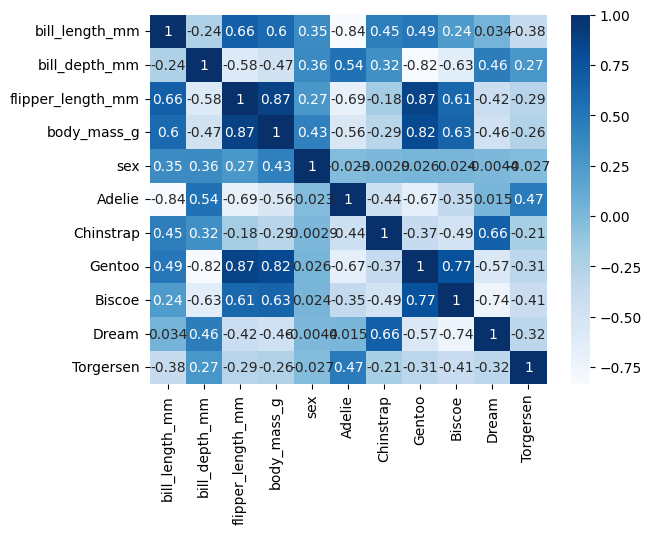

In [36]:
# 상관계수 히트맵
import seaborn as sns
corr = df_data_mart.corr()
sns.heatmap(corr,annot=True,cmap='Blues')

In [48]:
le_species.classes_

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [56]:
df_preprocessing = df_fill_na_by_std_mass.copy()
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# 라벨인코딩 먼저
le_species = LabelEncoder()
le_island = LabelEncoder()
le_sex = LabelEncoder()
df_preprocessing['species'] = le_species.fit_transform(df_preprocessing['species'])
df_preprocessing['island'] = le_island.fit_transform(df_preprocessing['island'])
df_preprocessing['sex'] = le_sex.fit_transform(df_preprocessing['sex'])

df_preprocessing
# sex => 1/0으로 추가 인코딩 불필요(True/False)

# OneHotEncoding
ohe_island = OneHotEncoder(sparse_output=False)
oh_island = ohe_island.fit_transform(pd.DataFrame(df_preprocessing['island']))
df_oh_species = pd.DataFrame(oh_species,columns=le_species.classes_).astype(int)
df_oh_island = pd.DataFrame(oh_island,columns=le_island.classes_).astype(int)
df_data_mart_sns = pd.concat((df_preprocessing.reset_index(drop=True).drop(['island'],axis=1),df_oh_species),axis=1)
df_data_mart_sns = pd.concat((df_data_mart_sns,df_oh_island),axis=1)
df_data_mart_sns.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Adelie,Chinstrap,Gentoo,Biscoe,Dream,Torgersen
0,0,39.1,18.7,181.0,3750.0,1,1,0,0,0,0,1
1,0,39.5,17.4,186.0,3800.0,0,1,0,0,0,0,1
2,0,40.3,18.0,195.0,3250.0,0,1,0,0,0,0,1
3,0,36.7,19.3,193.0,3450.0,0,1,0,0,0,0,1
4,0,39.3,20.6,190.0,3650.0,1,1,0,0,0,0,1


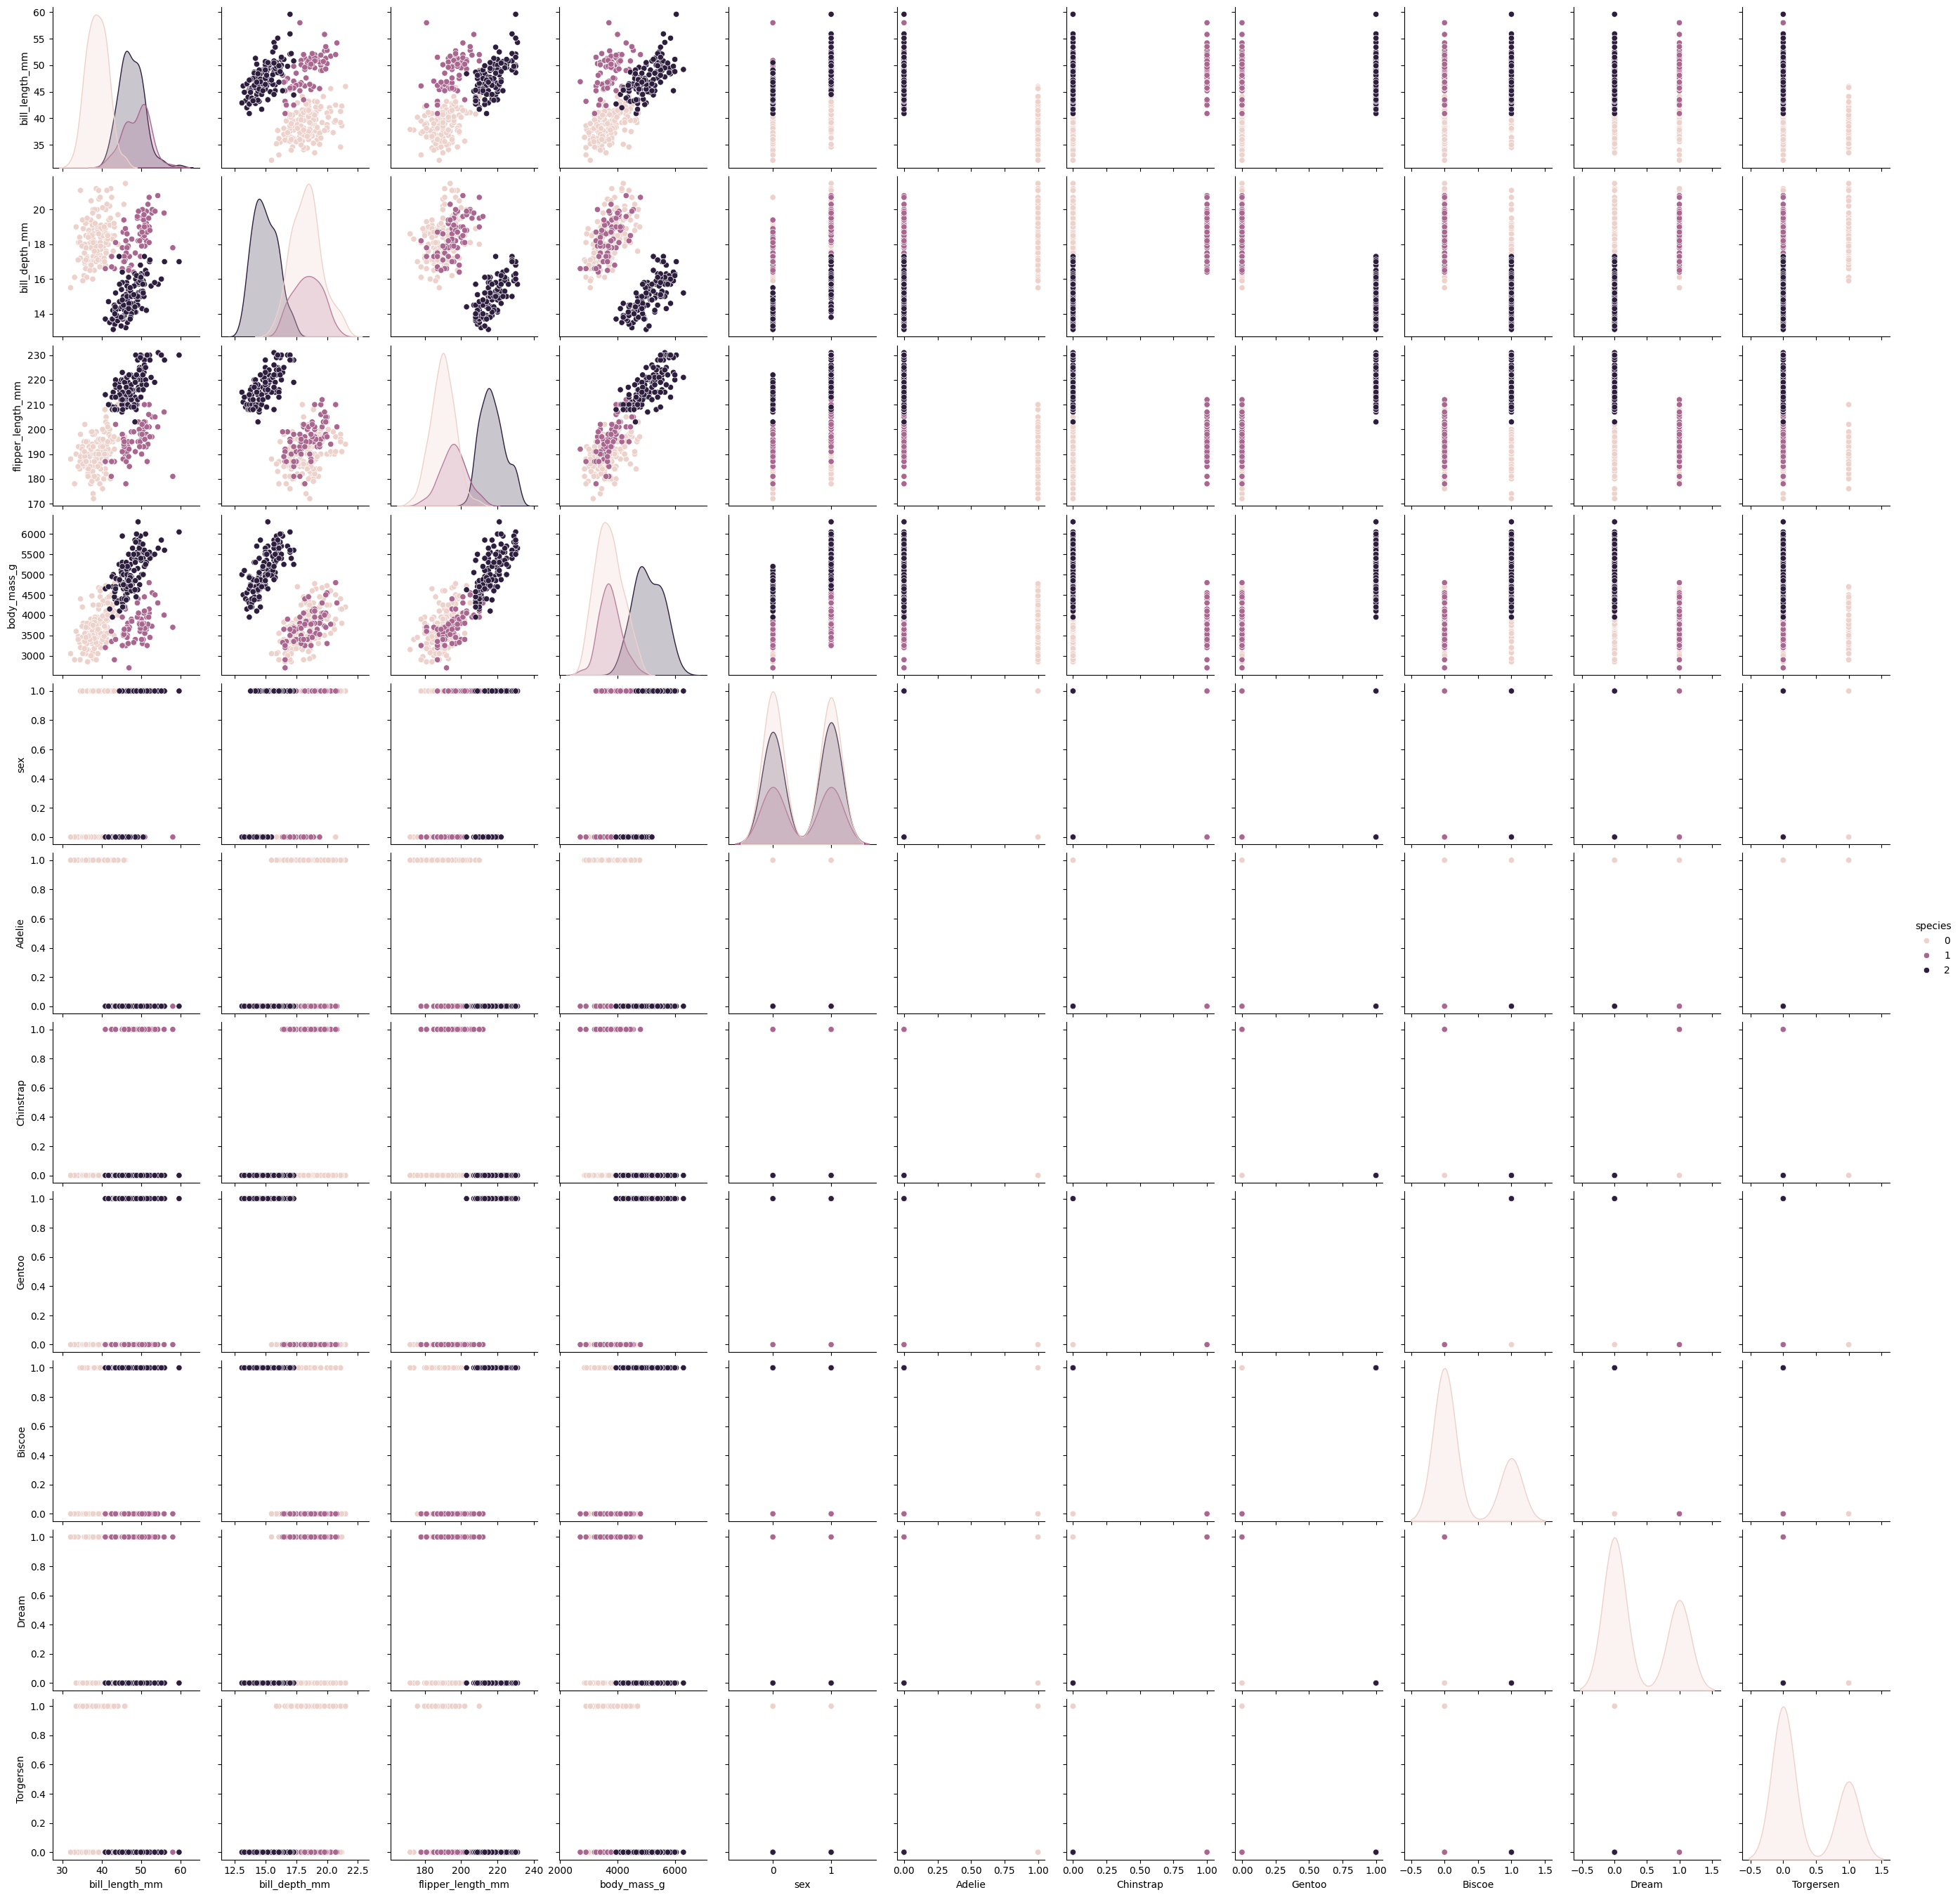

In [58]:
# 각 속성간의 산점도
import matplotlib.pyplot as plt
sns.pairplot(df_data_mart_sns,kind='scatter',hue='species')
plt.show()

#### 5. 데이터를 분할하고, 분류 모델을 학습하세요.

종(species)을 타겟 변수, 나머지 속성을 예측변수로 설정합니다.  
훈련 데이터와 평가 데이터를 7:3 비율로 분할합니다.

훈련 데이터로 분류 모델을 학습시킵니다.

In [ ]:
# 데이터 분리
from sklearn.model_selection import train_test_split
Y = df_data_mart[le_species.classes_]
X = df_data_mart.drop(Y.columns,axis=1)
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,train_size=0.7)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((239, 8), (103, 8), (239, 3), (103, 3))

In [62]:
# 모델
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
data =rf_model.fit(X_train,Y_train)
data

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


#### 6. 정확도와 혼동 행렬을 구하세요.

모델에 평가 데이터로 예측하고, 정확도와 혼동 행렬을 출력합니다.  
혼동 행렬은 레이블이 n개인 경우 n x n 행렬입니다.  
행은 실제 레이블, 열은 예측 레이블을 나타냅니다.

In [73]:
pred = data.predict(X_test).argmax(axis=1)
real = Y_test.values.argmax(axis=1)

# pred.shape, real.shape
pd.crosstab(real,pred,colnames=['예측값'],rownames=["실제값"])

예측값,0,1,2
실제값,,,
0,48,0,0
1,1,17,0
2,0,0,37


In [82]:
print('accuracy :', round(rf_model.score(X_test,Y_test),2))


accuracy : 0.99
